# O Problema / The Problem

## O Problema

Uma empresa varejista coletou dados de 1000 clientes que realizaram compras online em diversas partes do Brasil.

A ideia da companhia é conhecer melhor o perfil de seus clientes a
fim de oferecer novos itens, promoções e alavancar as vendas.

A equipe de cientistas de dados analisou o caso e identificou que, para a realização dessa tarefa, é necessário realizar um agrupamento dos dados para realizar a segmentação dos clientes.

**Lista de atividades**
1. Coleta de dados;
2. Análise dos dados coletados;
3. Realizar o tratamento de dados;
4. Manipulação e visualização de dados;
5. Aplicação de algoritmo de Machine Learning k-means;
6. Análise de dados gerados;
7. Realizar a segmentação dos clientes.

----
## The Problem

A retail company have collected data from 1000 customers who made online purchases in different parts of Brazil.

The company's idea is to better understand the profile of its customers
in order to offer new items, promotions and to boost its sales.

The Data Scientists team analyzed the case and identified that, in order to carry out this task, it is necessary to group the data to perform the segmentation of customers.

**Activities list**
1. Data collection;
2. Analysis of the collected data;
3. Carry out data processing;
4. Data manipulation and visualization;
5. Application of k-means Machine Learning algorithm;
6. Analysis of the generated data;
7. Perform customer segmentation.


# **1.** Coleta de Dados e Iniciando Bibliotecas - Data Collection and Initiating Libraries

## Bibliotecas necessárias / Needed Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                     #For Statistical data visualization as boxplot
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go
from sklearn.cluster import KMeans        #Machine Learning library for Python. This one specifically: loads KMeans

# Este Jupyter Notebook foi criado inicialmente usando
# This Jupyter Notebook was initially created running
# pandas version 1.3.5
# numpy version  1.22.0
# plotly version 5.10.0
# sklearn version 1.0.2

# Se você gostaria de checar as versões do plotly e do sklearn instalados, por favor, retire o comentário (#) das duas últimas linhas abaixo.
# If you want to check the version of plotly and skylearn, please uncomment the last two lines below
# import plotly
# import sklearn

In [2]:
print(f''' Verificando as versões das bibliotecas usadas / Verifying currently used Libraries versions: 
pandas: {pd.__version__}
numpy: {np.__version__}
''')

 Verificando as versões das bibliotecas usadas / Verifying currently used Libraries versions: 
pandas: 1.3.5
numpy: 1.22.0



## Coleta de Dados / Data Collection

In [3]:
# Dados dos clientes (arquivo em xlsx) / Customer data (.xlsx file)
customer_data = pd.read_excel('./clientes.xlsx')

# Dados dos estados brasileiros (arquivo em csv) / Brazilian States data (.csv file)
states = pd.read_csv('./estados_brasileiros.csv', sep=';', encoding = 'latin-1')

# Dados complementares dos clientes / Additional Customer data
customer_data_add = pd.read_csv('./dados_complementares.csv', sep = ';', encoding = 'latin-1')


# **2.** Análise dos Dados Coletados / General Analysis of the collected data

In [4]:
#2.1 Ver a primeira entrada para de cada dado coletado
#2.1 See the first entry from each collected data
customer_data[:1]

,cod_cliente,cod_genero,genero,idade
0,1,0,masculino,17.0


In [5]:
states[:1]

,cod_estado,estado,sigla_estado,pais
0,1,Acre,AC,Brasil


In [6]:
customer_data_add[:1]

,cod_cliente,aposentado,salario,plano_saude,qtd_filhos,compras_3M,cod_estado
0,1,0,1502.0,1,3,1.0,5


In [7]:
#2.2: Usando a função info(). Objetivo: ver tipo dos dados e dados faltantes
#2.2: Using the info() function. Objective: see the data types and missing data
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cod_cliente  1000 non-null   int64  
 1   cod_genero   1000 non-null   int64  
 2   genero       1000 non-null   object 
 3   idade        989 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


In [8]:
#2.3 Usando a função isna().sum(). Objetivo: ver a quantidade total de dados faltantes. 0 se não há dados faltantes.
#2.3 Using the function isna().sum(). Objetive: see the total amount of missing data. 0 if none.

customer_data.isna().sum()

cod_cliente     0
cod_genero      0
genero          0
idade          11
dtype: int64

1. Existem 11 dados faltando na coluna de `idade`. `cod_cliente`, `cod_genero` são tipo inteiro.
2. `genero` é tipo texto (object).
3. `idade` está como float.
----
1. There are 11 missing data in `idade` (age) column.
2. `cod_cliente`, `cod_genero` are integers.
3. The type of `genero` (gender) is string (object).

In [9]:
customer_data_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cod_cliente  1000 non-null   int64  
 1   aposentado   1000 non-null   int64  
 2   salario      994 non-null    float64
 3   plano_saude  1000 non-null   int64  
 4   qtd_filhos   1000 non-null   int64  
 5   compras_3M   987 non-null    float64
 6   cod_estado   1000 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 54.8 KB


In [10]:
customer_data_add.isna().sum()

cod_cliente     0
aposentado      0
salario         6
plano_saude     0
qtd_filhos      0
compras_3M     13
cod_estado      0
dtype: int64

1. Existem 6 dados faltando na coluna de `salario`, e 13 na coluna de `compras_3M`. 
2. `cod_cliente`, `aposentado`, `plano_saude`, `qnt_filhos` e `cod_estado` são do tipo inteiro. 
3. `salario` e `compras_3M` (compra feita nos últimos 3 meses) são float.
----
1. There are 6 missing data in `salario` (salary), and 13 in `compras_3M`. 
2. `cod_cliente` (customer number), `aposentado` (retired), `plano_saude` (health care), `qnt_filhos` (number of children) and `cod_estado` (State number) are integers. 
3. `salario` and `compras_3M` (purchase made in the last 3 months) are float.

In [11]:
states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cod_estado    27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          27 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


1. Não existem dados faltantes.
2. `estado`, `sigla_estado` e `pais` são tipo texto (object).
----
1. There is no missing data.
2. `estado` (State), `sigla_estado` (State Acronym) e `pais` (Country) are all strings (object).

In [12]:
#2.4 Usando describe(). Objetivo: ver um resumo estatístico dos dados coletados
#2.4 Using describe(). Objective: see a statistical summary of the collected data 
customer_data.describe()

,cod_cliente,cod_genero,idade
count,1000.000000,1000.000000,989.000000
mean,500.500000,0.492000,48.672396
std,288.819436,0.500186,19.286196
min,1.000000,0.000000,16.000000
25%,250.750000,0.000000,32.000000
50%,500.500000,0.000000,47.000000
75%,750.250000,1.000000,63.000000
max,1000.000000,1.000000,90.000000


Dos dados acima, uma vez que `cod_genero` associa os valores 0 para sexo masculino ou 1 para sexo feminino, pela média de `cod_genero`, temos 49,2% de clientes do sexo feminino e 50,8% do sexo masculino.

----

From the data above, since `cod_genero` takes the values 0 to masculine sex and 1 to feminine sex, seeing the `cod_genero` mean, we have 49,2% of customers of the feminine sex and 50,8% of customers of the masculine sex in this database.


In [13]:
customer_data_add.describe()

,cod_cliente,aposentado,salario,plano_saude,qtd_filhos,compras_3M,cod_estado
count,1000.000000,1000.000000,994.000000,1000.000000,1000.000000,987.000000,1000.000000
mean,500.500000,0.213000,5515.832998,0.514000,2.575000,0.555218,13.988000
std,288.819436,0.409633,2398.321322,0.500054,1.694475,0.497194,7.754611
min,1.000000,0.000000,1350.000000,0.000000,0.000000,0.000000,1.000000
25%,250.750000,0.000000,3496.750000,0.000000,1.000000,0.000000,7.000000
50%,500.500000,0.000000,5465.500000,1.000000,3.000000,1.000000,14.000000
75%,750.250000,0.000000,7445.000000,1.000000,4.000000,1.000000,21.000000
max,1000.000000,1.000000,9997.000000,1.000000,5.000000,1.000000,27.000000


Agora vemos que 51,4% das pessoas neste banco de dados possuem um plano de saúde (`plano_saude`=1).

----
Now we see that 51,4% of the people in this database have a health care plan (`plano_saude` = 1).

# **3.** Tratamento dos Dados Faltantes / Missing Data Processing

Nas instruções do serviço nos é dito que:
* Não existem compras nos últimos três meses para registros nulos.
* Se houver dados de idade/quantidade de filhos faltando, trocar pela média da idade/quantidade de filhos do gênero do/da cliente.
* Na ausência de dados de salário, se aposentado ou não, ou se possui plano de saúde ou não, eliminar os registros.
* Para outras variáveis categóricas, utilizar a correção pela moda da variável

Para os nossos dados, essas condições são equivalentes a:
1. Tomar como **0** todos os dados nulos em `'compras_3M'` .
2. Para os dados faltantes em "idade", trocar os dados faltantes pela média do gênero do/da cliente.
3. Apagar todos os registros de `'salario'` faltantes.

----
In the service instructions we are told that:
* Null registrations for in the last three months means that there were no purchases in this period.
* If age/number of children info are missing, replace them by the average age/number of children of the customer's sex.
* In the absence of data about salary, whether retired or not, or whether having health insurance or not, delete the records.
* For other categorical variables, correct the data using the mode of the variable

In the current data, all of these are equivalent to:
1. Setting **0** to all null `'compras_3M'`.
2. For the missing age data (`'idade'`), change the missing data considering the customer's sex.
3. Deleting all the missing records of `'salario'`.

In [14]:
#3.1: Vamos tomar 0 todos os dados nulos em "compras_3M"
#3.1: Let's set 0 to all null data in "compras_3M"
customer_data_add.compras_3M.fillna(0,inplace=True)

#3.2: Vamos apagar todos os dados nulos em "salario"
#3.2: Let's drop all null data in "salario"
customer_data_add.dropna(subset=['salario'], inplace=True)
customer_data_add.isna().sum()

cod_cliente    0
aposentado     0
salario        0
plano_saude    0
qtd_filhos     0
compras_3M     0
cod_estado     0
dtype: int64

In [15]:
#3.3: Vamos encontrar a média de idades por gênero primeiro. 
#   Definimos uma variável média para tais dados. Tornamos essas variáveis como inteiras.
#   Finalmente preenchemos os dados vazios por tais médias

#3.3: Let's first find the mean age by gender sex. 
#   Then, we define variables called mean for each data. We turn these variables to integer numbers.
#   Finally we fill the missing data with the mean found.

mean_age = customer_data.groupby('genero')['idade'].mean()

mean_age

genero
feminino     47.707819
masculino    49.604374
Name: idade, dtype: float64

In [16]:
mean_age_feminine = int(mean_age['feminino']) #Média de idade sexo feminino / Mean for the feminine sex
mean_age_masculine = int(mean_age['masculino'])  #Média de idade sexo masculino/ Mean for the masculine sex

In [17]:
print(f' Idade média Sexo Feminino: {mean_age_feminine}\n Idade média Sexo Masculino: {mean_age_masculine}')
print(f' Mean age of Feminine sex: {mean_age_feminine}\n Mean age of Masculine sex: {mean_age_masculine}')

 Idade média Sexo Feminino: 47
 Idade média Sexo Masculino: 49
 Mean age of Feminine sex: 47
 Mean age of Masculine sex: 49


In [18]:
customer_data.loc[(customer_data['genero']=='masculino') & (customer_data['idade'].isnull()),'idade'] = mean_age_masculine
customer_data.loc[(customer_data['genero']=='feminino') & (customer_data['idade'].isnull()),'idade'] = mean_age_feminine

In [19]:
customer_data.isna().sum()

cod_cliente    0
cod_genero     0
genero         0
idade          0
dtype: int64

# **4.** Manipulação e Visualização de Dados / Data Manipulation and Visualization

## 4.1 - Manipulação de Dados / Data Manipulation

In [20]:
#4.1: Vamos primeiro ver quais indexadores são comuns de cada banco de dados
#4.2: Let's first check which indices are common to each database

In [21]:
customer_data.columns

Index(['cod_cliente', 'cod_genero', 'genero', 'idade'], dtype='object')

In [22]:
customer_data_add.columns

Index(['cod_cliente', 'aposentado', 'salario', 'plano_saude', 'qtd_filhos',
       'compras_3M', 'cod_estado'],
      dtype='object')

In [23]:
states.columns

Index(['cod_estado', 'estado', 'sigla_estado', 'pais'], dtype='object')

Acima nós percebemos que
* `customer_data` possui `'cod_cliente'` em comum com `customer_data_add`
* `customer_data_add` possui `'cod_estado'` em comum com `states`.

----
From above, we notice that
* both `customer_data` and `customer_data_add` have `'cod_cliente'`
* both `customer_data_add` and `states` have `'cod_estado'`.

In [24]:
#4.2: Vamos unir os dados de customer_data e customer_data_add a um novo conjunto de dados chamado all_data_customer.
#     Então, vamos adicionar a este conjunto, os dados em states. Chamaremos este de customer_full_data

#4.2: Let's first join the data in customer_data and customer_data_add to a new dataframe called all_data_customer.
#     Then, let's add to this dataframe the data in states, and call it customer_full_data

all_data_customer = pd.merge(customer_data,customer_data_add, on= 'cod_cliente').sort_values('cod_cliente')

all_data_customer.columns

Index(['cod_cliente', 'cod_genero', 'genero', 'idade', 'aposentado', 'salario',
       'plano_saude', 'qtd_filhos', 'compras_3M', 'cod_estado'],
      dtype='object')

In [25]:
customer_full_data = pd.merge(all_data_customer,states, on= 'cod_estado').sort_values('cod_cliente')

In [26]:
# Agora que criamos nosso banco de dados principal, vamos apagar as variáveis extras e não usadas daqui por diante.
## Essa prática é útil para gerenciamento de memória.

# Now that we have created our main database, we will delete all the unused variables we have created so far.
## This is a good practice for memory management.
del all_data_customer, customer_data_add, customer_data, mean_age, mean_age_feminine, mean_age_masculine

In [27]:
customer_full_data.head(3)

,cod_cliente,cod_genero,genero,idade,aposentado,salario,plano_saude,qtd_filhos,compras_3M,cod_estado,estado,sigla_estado,pais
0,1,0,masculino,17.0,0,1502.0,1,3,1.0,5,Bahia,BA,Brasil
27,2,0,masculino,28.0,0,9928.0,0,1,1.0,18,Piauí,PI,Brasil
71,3,0,masculino,62.0,0,9966.0,1,4,1.0,16,Paraná,PR,Brasil


In [28]:
#4.3: Finalmente, vamos fazer uma seleção das colunas neste novo dataset. Logo em seguida resetamos os valores dos indices do dataframe com reset_index(drop=True)
#4.3: Finally, let's do a selection of which columns we want in the dataset. Right after, we reset the datafram index values with com reset_index(drop=True)

column_order = ['cod_cliente','genero','idade','salario','aposentado','plano_saude','qtd_filhos','compras_3M','estado','sigla_estado']
customer_full_data = customer_full_data[column_order].reset_index(drop=True)
del column_order

In [29]:
customer_full_data.head(3)

,cod_cliente,genero,idade,salario,aposentado,plano_saude,qtd_filhos,compras_3M,estado,sigla_estado
0,1,masculino,17.0,1502.0,0,1,3,1.0,Bahia,BA
1,2,masculino,28.0,9928.0,0,0,1,1.0,Piauí,PI
2,3,masculino,62.0,9966.0,0,1,4,1.0,Paraná,PR


In [30]:
# 4.4: Agora, para uma melhor visualização dos dados, vamos passar alguns dados 1/0 para Sim/Não.
#     Adicionalmente, vamos criar uma coluna para região do país: Norte, Nordeste, Sul, Sudeste e Centro-Oeste.

# 4.4: Now, to a better data look, we are going to change the indices with values 1/0 to 'Sim' (Yes) / 'Não' (No).
#     Additionally, we are going to create an new column labelling each Brazilian State to its region:
#     North ('Norte), South ('Sul'), Northest ('Nordeste'), Southest ('Sudeste') and Midwest ('Centro-Oeste')

customer_full_data.loc[customer_full_data['aposentado']==1,'aposentado'] = 'Sim'
customer_full_data.loc[customer_full_data['aposentado']==0,'aposentado'] = 'Não'
customer_full_data.loc[customer_full_data['plano_saude']==0,'plano_saude'] = 'Não'
customer_full_data.loc[customer_full_data['plano_saude']==1,'plano_saude'] = 'Sim'
customer_full_data.loc[customer_full_data['compras_3M']==1.0,'compras_3M'] = 'Sim'
customer_full_data.loc[customer_full_data['compras_3M']==0.0,'compras_3M'] = 'Não'

regiao_norte = ['AC','AP','AM','PA','RO','RR','TO']
regiao_nordeste = ['CE','MA','BA','PE','PB','RN','PI','AL','SE']
regiao_centroeste = ['MT','MS','GO','DF']
regiao_sudeste = ['RJ','SP','MG','ES']
regiao_sul = ['SC','PR','RS']
customer_full_data.loc[customer_full_data['sigla_estado'].isin(regiao_norte),'Região'] = 'Norte'
customer_full_data.loc[customer_full_data['sigla_estado'].isin(regiao_nordeste),'Região'] = 'Nordeste'
customer_full_data.loc[customer_full_data['sigla_estado'].isin(regiao_sudeste),'Região'] = 'Sudeste'
customer_full_data.loc[customer_full_data['sigla_estado'].isin(regiao_sul),'Região'] = 'Sul'
customer_full_data.loc[customer_full_data['sigla_estado'].isin(regiao_centroeste),'Região'] = 'Centro-Oeste'

In [31]:
customer_full_data.tail()

,cod_cliente,genero,idade,salario,aposentado,plano_saude,qtd_filhos,compras_3M,estado,sigla_estado,Região
989,996,masculino,69.0,4910.0,Sim,Sim,4,Sim,Alagoas,AL,Nordeste
990,997,feminino,50.0,6110.0,Não,Sim,3,Não,Mato Grosso,MT,Centro-Oeste
991,998,feminino,61.0,4820.0,Não,Sim,4,Sim,Maranhão,MA,Nordeste
992,999,feminino,64.0,9361.0,Não,Sim,1,Não,Amazonas,AM,Norte
993,1000,masculino,28.0,5025.0,Não,Não,0,Sim,Bahia,BA,Nordeste


## 4.2 - Visualização de Dados / Data Visualization

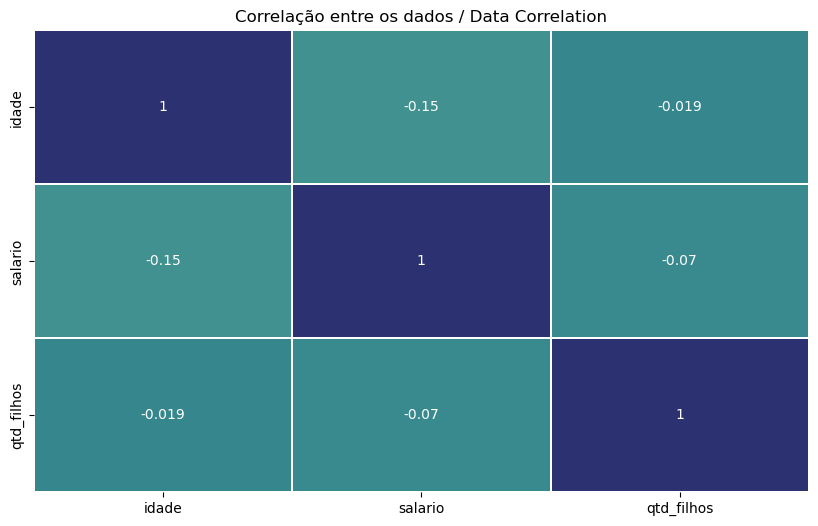

In [32]:
#4.6: Checando correlação entre os dados
#4.6: Checking correlation between all the data

plt.figure(figsize=(10,6))
plt.title('Correlação entre os dados / Data Correlation')
dados_corr = customer_full_data[['idade','salario','qtd_filhos']]
sns.heatmap(dados_corr.corr(), cmap='crest',linewidths=0.1,linecolor='white',annot=True, cbar=False, vmin=-1, vmax = 1)
sns.set_context('notebook', font_scale=1.44)

In [33]:
del dados_corr

A partir do gráfico acima, vemos pouca correlação entre idade, salário e quantidade de filhos.

----
From the plot above, we see little correlation bewteen age ['idade'], salary ['salario'] and number of children ['qtd_filhos'].

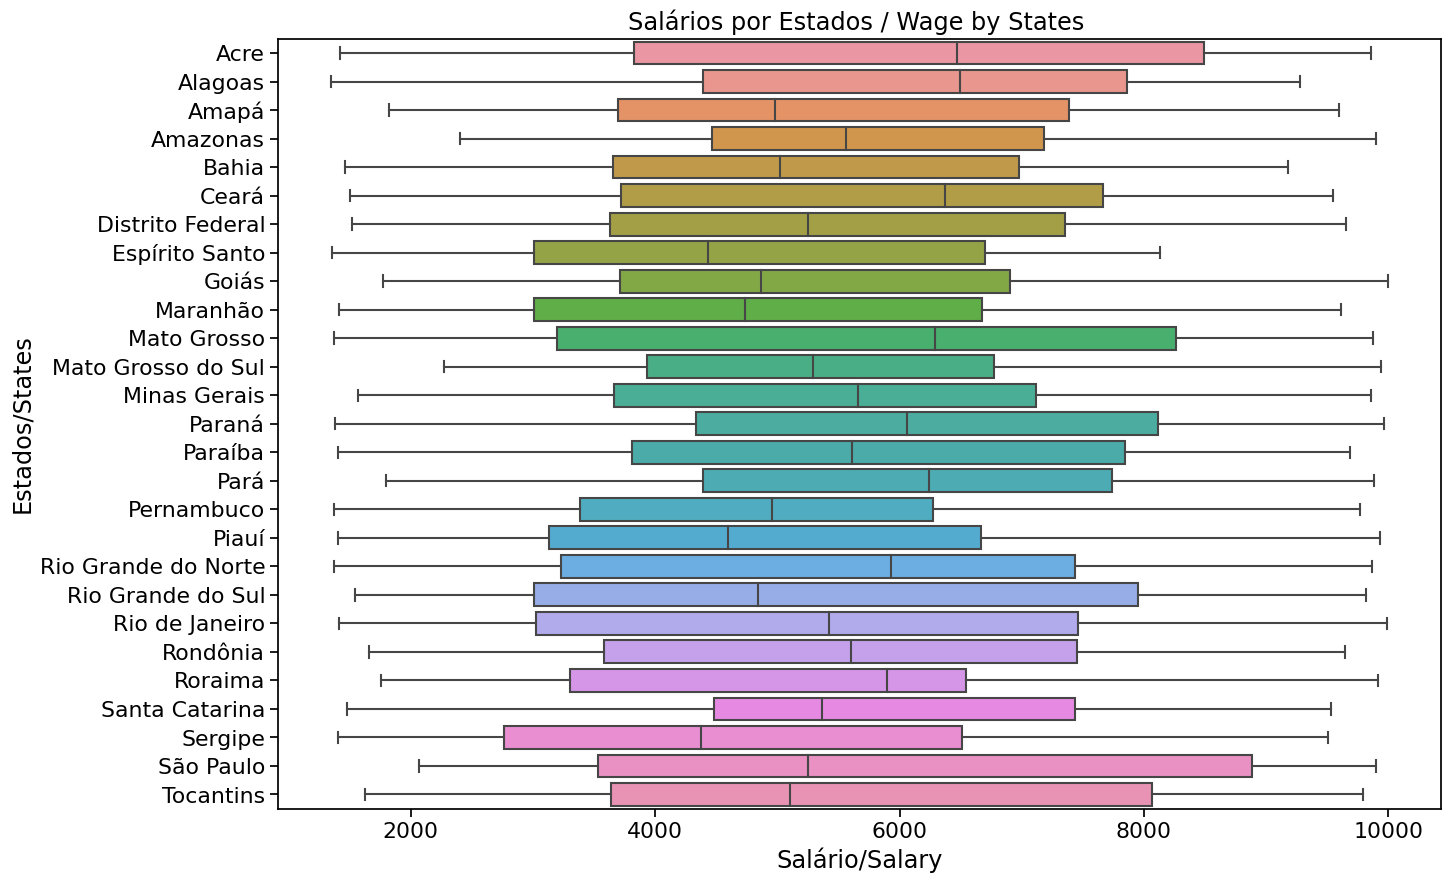

In [34]:
plt.figure(figsize=(15,10))
plt.title('Salários por Estados / Wage by States ')
plot1 = sns.boxplot(x= 'salario', y= 'estado', data=customer_full_data.sort_values('estado'), orient='h')
plot1.set(xlabel ='Salário/Salary', ylabel = 'Estados/States')
sns.set_context('notebook', font_scale=1.17)

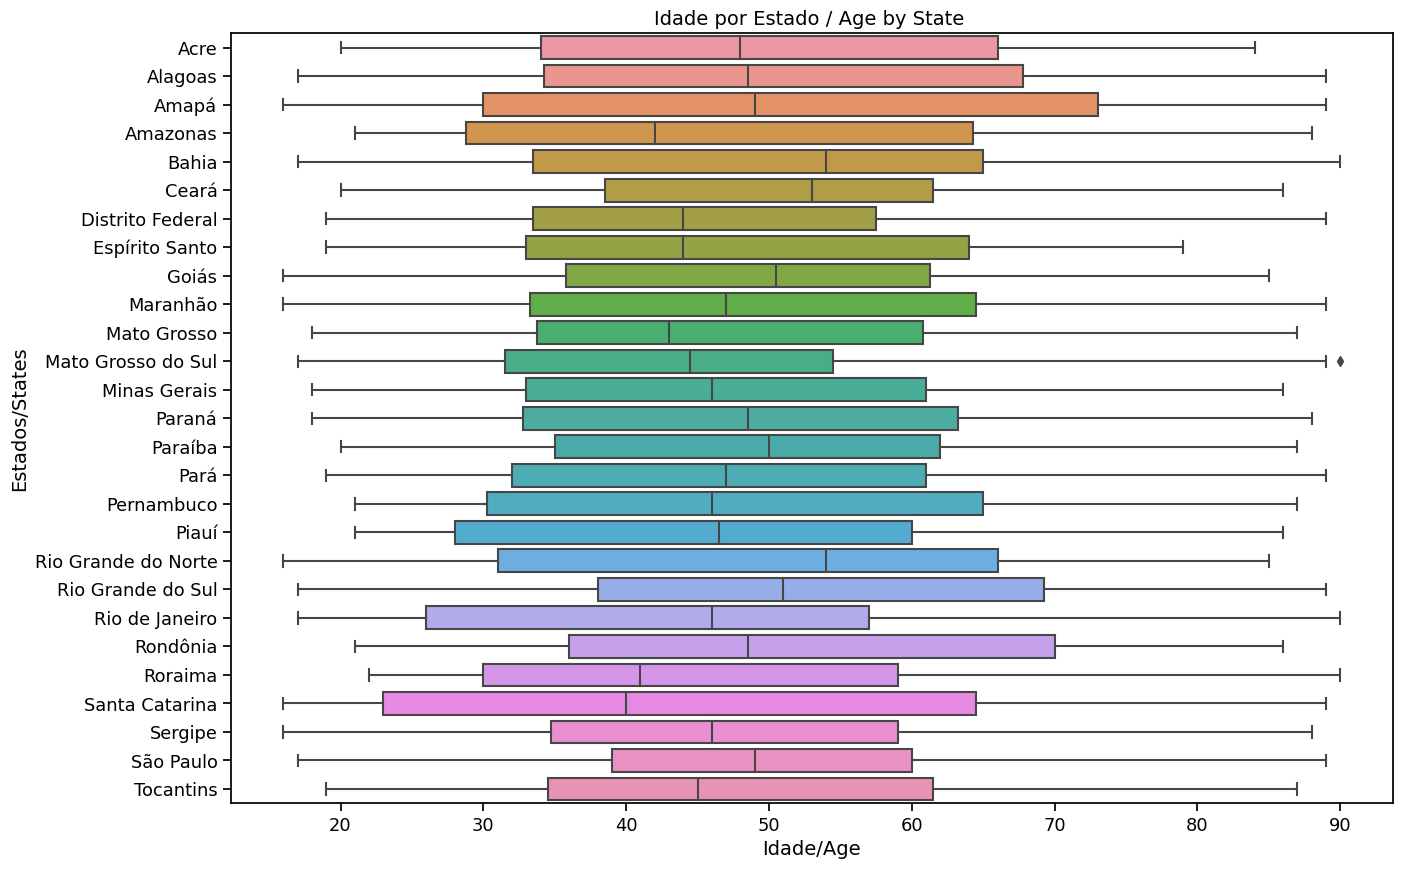

In [35]:
plt.figure(figsize=(15,10))
plt.title('Idade por Estado / Age by State ')
plot1 = sns.boxplot(x= 'idade', y= 'estado', data=customer_full_data.sort_values('estado'), orient='h')
plot1.set(xlabel= 'Idade/Age', ylabel= 'Estados/States')
sns.set_context('notebook', font_scale=1.17)

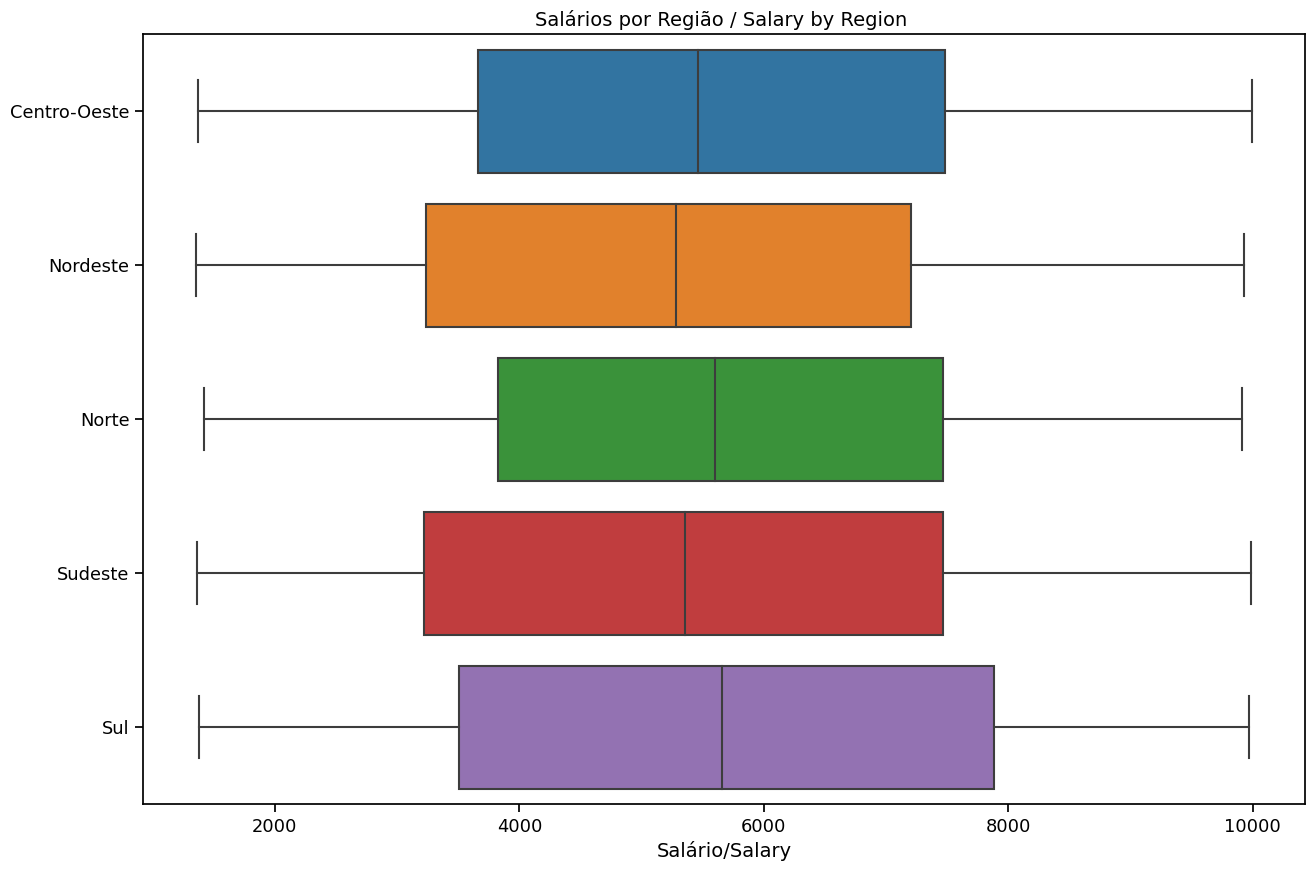

In [36]:
plt.figure(figsize=(15,10))
plt.title('Salários por Região / Salary by Region ')
plot1 = sns.boxplot(x= 'salario', y= 'Região', data=customer_full_data.sort_values('Região'), orient='h')
plot1.set(xlabel ='Salário/Salary', ylabel = '')
sns.set_context('notebook', font_scale=1.17)

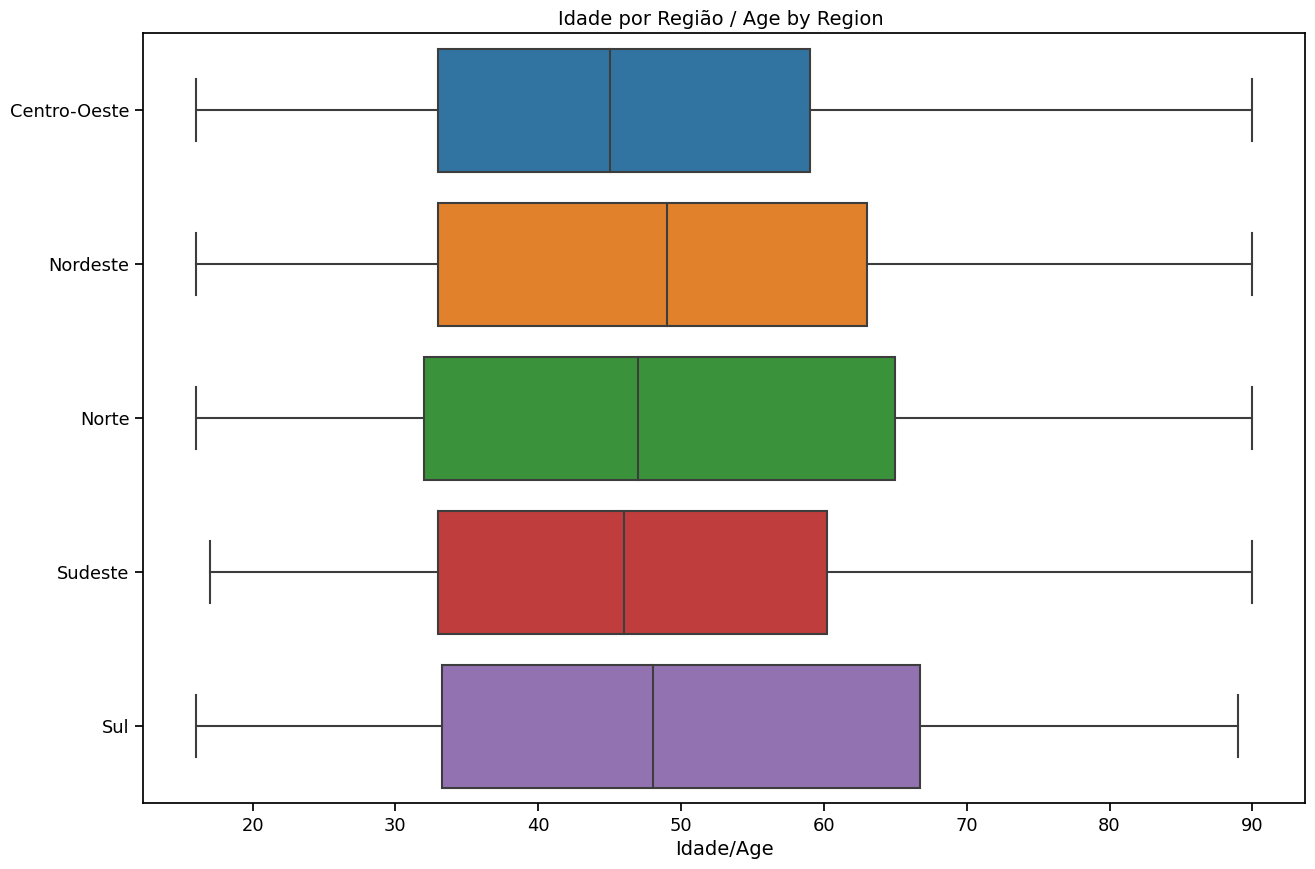

In [37]:
plt.figure(figsize=(15,10))
plt.title('Idade por Região / Age by Region ')
plot1 = sns.boxplot(x= 'idade', y= 'Região', data=customer_full_data.sort_values('Região'), orient='h')
plot1.set(xlabel= 'Idade/Age', ylabel= '')
sns.set_context('notebook', font_scale=1.17)

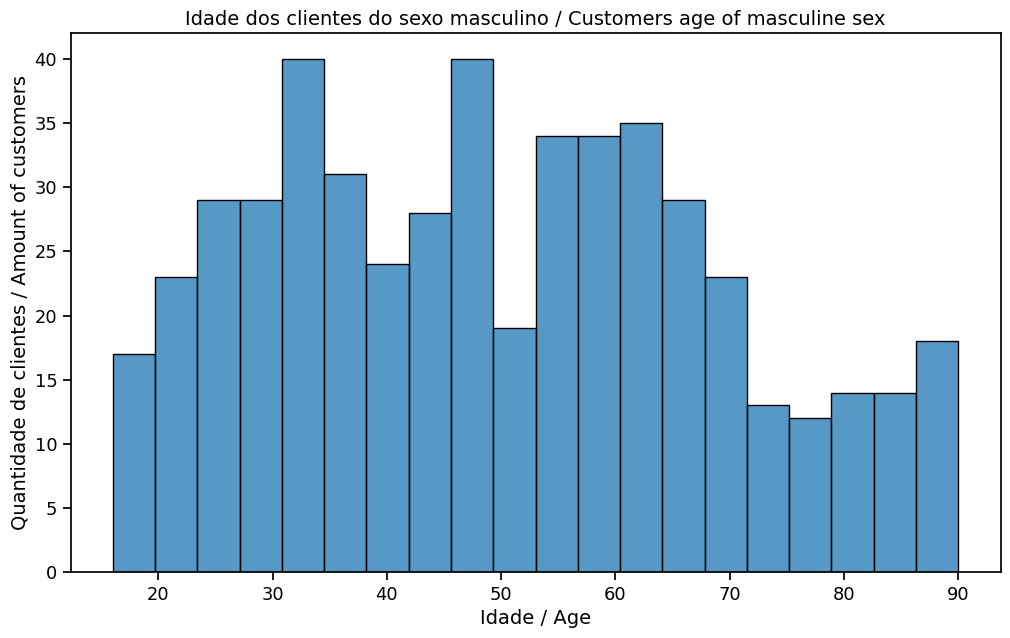

In [38]:
idade_byGenero_processed = customer_full_data.query('genero == "masculino"').reset_index(drop=True)
plt.figure(figsize=(12,7))
plt.title('Idade dos clientes do sexo masculino / Customers age of masculine sex')
plt.xlabel('Idade / Age')
plt.ylabel('Quantidade de clientes / Amount of customers')
sns.histplot(idade_byGenero_processed.idade, bins=20)
sns.set_context('notebook')

[Text(0.5, 0, 'Estados / States'),
 Text(0, 0.5, 'Quantidade de clientes / Amount of customers')]

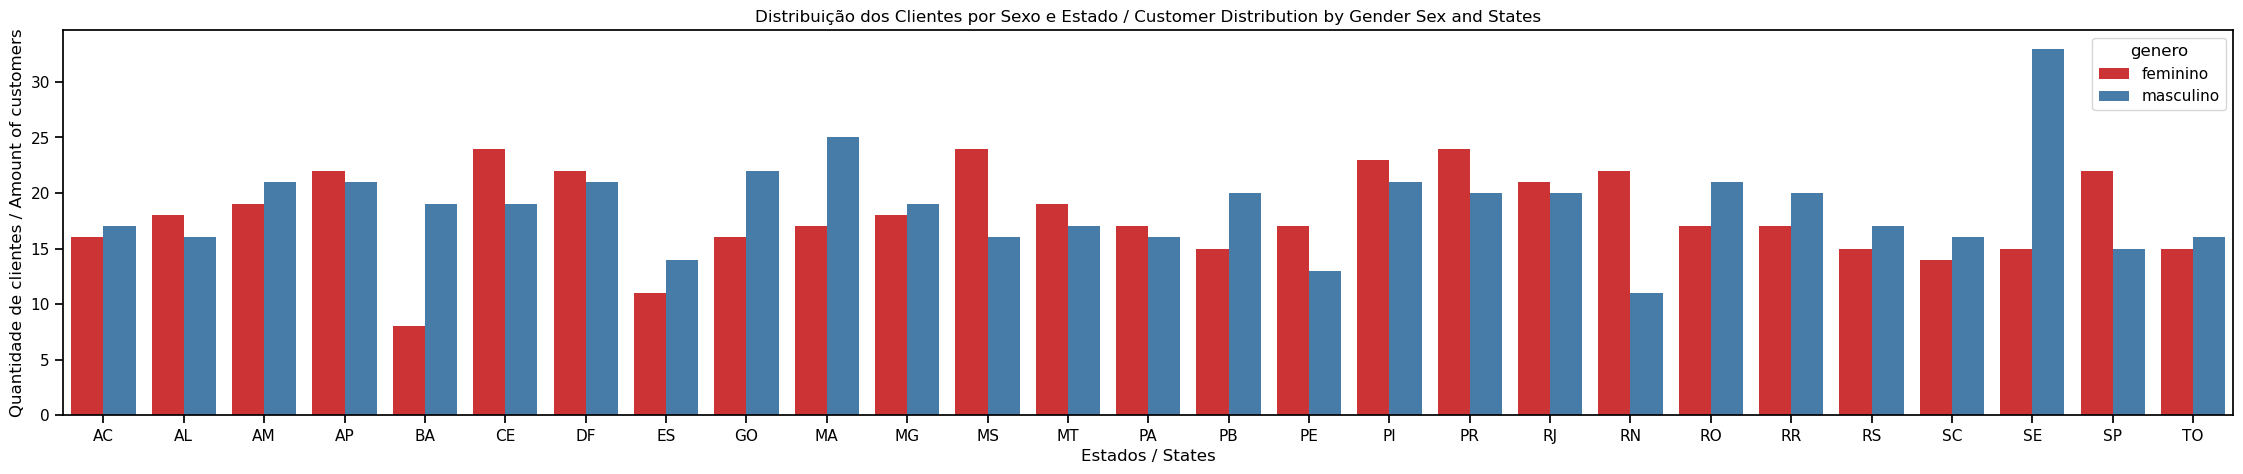

In [39]:
plt.figure(figsize=(28,5))
plt.title('Distribuição dos Clientes por Sexo e Estado / Customer Distribution by Gender Sex and States')
plot_GenderSex_state = sns.countplot(x='sigla_estado', data = customer_full_data.sort_values('sigla_estado'), hue='genero', palette='Set1')
plot_GenderSex_state.set(xlabel = 'Estados / States', ylabel = 'Quantidade de clientes / Amount of customers')

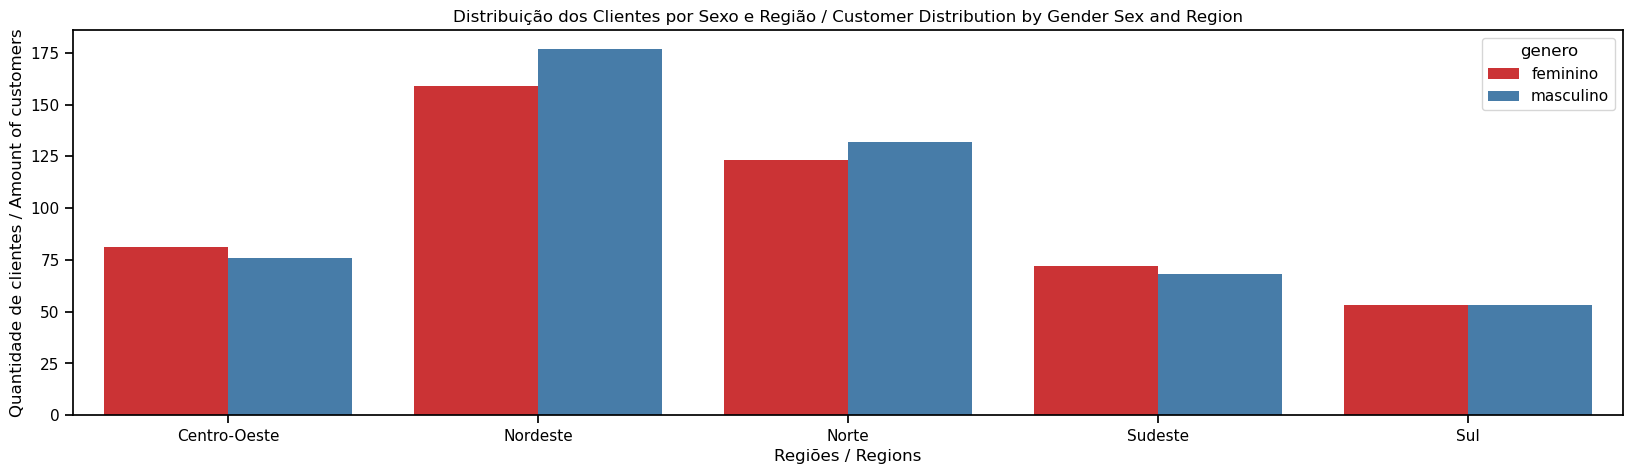

In [40]:
# É difícil ler o gráfico acima com tantas informações de estados, então agora fazemos o mesmo gráfico, porém por região
# It is quite hard to see the above plot, so now we plot it by Brazilian region
plt.figure(figsize=(20,5))
plt.title('Distribuição dos Clientes por Sexo e Região / Customer Distribution by Gender Sex and Region')
plot_GenderSex_state = sns.countplot(x='Região', data = customer_full_data.sort_values('Região'), hue='genero', palette='Set1')
plot_GenderSex_state.set(xlabel = 'Regiões / Regions', ylabel = 'Quantidade de clientes / Amount of customers')
sns.set_context('talk')

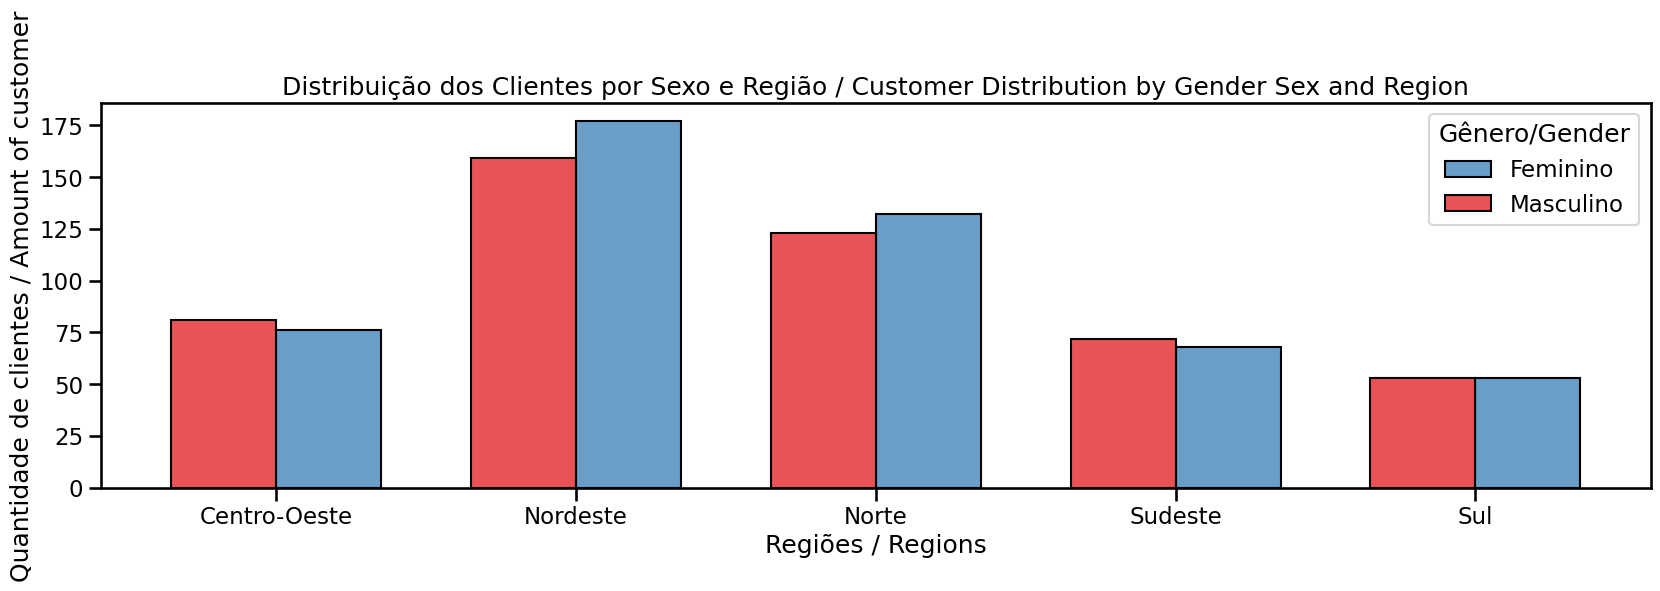

In [41]:
plt.figure(figsize=(20,5))
plt.title('Distribuição dos Clientes por Sexo e Região / Customer Distribution by Gender Sex and Region')
plot_GenderSex_state = sns.histplot(x='Região', data = customer_full_data.sort_values('Região'), hue='genero', palette='Set1',multiple='dodge', shrink = .7)
plot_GenderSex_state.set(xlabel = 'Regiões / Regions', ylabel = 'Quantidade de clientes / Amount of customer')
plt.legend(title='Gênero/Gender', loc='upper right', labels=['Feminino', 'Masculino'])
sns.set_context('talk')

# **5.** Aplicação do Algoritmo K-Means / Using K-Means Algorithm

## 5.1 - Normalização dos dados / Normalizing the data

### 5.1.1 - WCSS e o Método do Cotovelo / WCSS and the Elbow Method

In [42]:
#5.1: Para normalizar os dados, precisamos importar a biblioteca standard scale
#5.1: In order to normalize the date we need to import the standard scale library
from sklearn.preprocessing import StandardScaler

idade_salario = customer_full_data.iloc[:,[2,3]].values
idade_salario_normal = StandardScaler().fit_transform(idade_salario)

In [43]:
#5.1: Definindo uma função calculate_wcss tendo como entrada idade_salario_normal dos clientes
#5.1: Defing a new function calculate_wcss taking customer data from idade_salario_normal as entries.

def calculate_wcss(data_client):
  wcss = []
  for k in range(1,11):
    kmeans = KMeans(n_clusters= k, random_state=0)
    kmeans.fit(X=data_client)
    wcss.append(kmeans.inertia_)
  return wcss

In [44]:
#5.2: Calculando o valor de wcss para cada número de clusters.
#5.2: Calculating the wcss for each number of clusters
wcss_customer = calculate_wcss(idade_salario_normal)

In [45]:
for i in range(len(wcss_customer)):
  print(f'O cluster {i} possui wcss de {wcss_customer[i]} / The wcss value for the cluster {i} is {wcss_customer[i]}')

O cluster 0 possui wcss de 1987.9999999999998 / The wcss value for the cluster 0 is 1987.9999999999998
O cluster 1 possui wcss de 1198.319794784873 / The wcss value for the cluster 1 is 1198.319794784873
O cluster 2 possui wcss de 713.1813602046686 / The wcss value for the cluster 2 is 713.1813602046686
O cluster 3 possui wcss de 533.5083710793003 / The wcss value for the cluster 3 is 533.5083710793003
O cluster 4 possui wcss de 440.47682025266744 / The wcss value for the cluster 4 is 440.47682025266744
O cluster 5 possui wcss de 366.7241281394084 / The wcss value for the cluster 5 is 366.7241281394084
O cluster 6 possui wcss de 303.744557467596 / The wcss value for the cluster 6 is 303.744557467596
O cluster 7 possui wcss de 260.7134904507615 / The wcss value for the cluster 7 is 260.7134904507615
O cluster 8 possui wcss de 231.33906552729877 / The wcss value for the cluster 8 is 231.33906552729877
O cluster 9 possui wcss de 207.6636446317004 / The wcss value for the cluster 9 is 207.

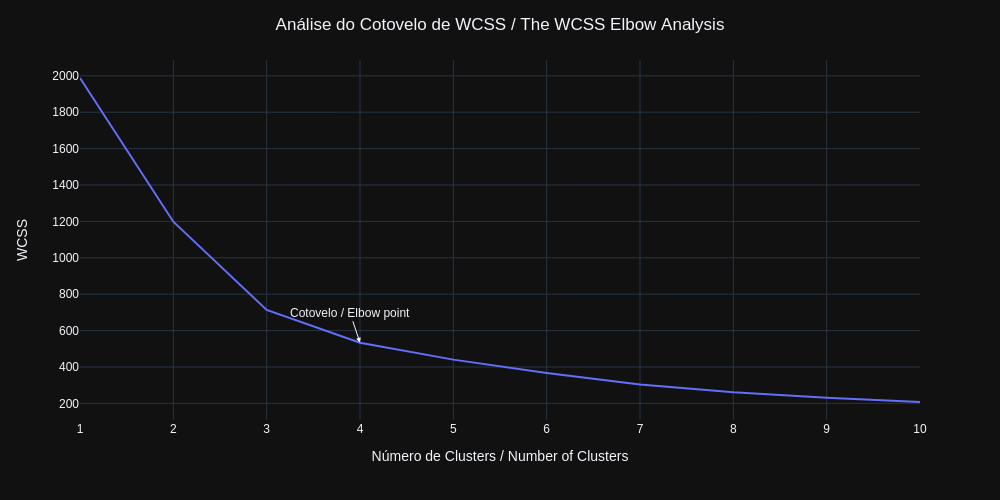

In [46]:
#5.3: Gráfico do WCSS por número de clusters dos dados normalizados
#5.3: Plot of the WCSS values by number of clusters of the normalized data

grafico_wcss = px.line(x= range(1,11),y=wcss_customer)
fig = go.Figure(grafico_wcss)
fig.update_layout(title = 'Análise do Cotovelo de WCSS / The WCSS Elbow Analysis',
                  title_x = 0.5,
                  xaxis_title = 'Número de Clusters / Number of Clusters',
                  yaxis_title = 'WCSS',
                  template='plotly_dark', width=1000)
fig.add_annotation(x=4, y=wcss_customer[4-1],
            text="Cotovelo / Elbow point",
            showarrow=True,
            arrowhead=2)
fig.show("png") 
# Eu adicionei a opção "png" para que o gráfico seja exibido no ambiente estático do GitHub. Remova "png" se você quiser vê-lo como um gráfico Plotly normal
# I've add the "png" option to showcase it on static environment from GitHub. Remove if you want to see it as a normal Plotly graph.

O melhor valor para o número de clusters pelo método do cotovelo é 4.

----
The best number for Clusters by the elbow Method is 4.

### 5.1.2 - Agrupando os dados com o uso do KMeans / Clustering the Data with KMeans

In [47]:
#5.4: Agora nós nos focamos no algoritmo KMeans com 4 clusters.
#5.4: We now focus on the KMeans with 4 clusters.

kmeans_customer = KMeans(n_clusters = 4, random_state=0)
customer_full_data['cluster'] = kmeans_customer.fit_predict(idade_salario_normal)
#Estamos adicionando uma nova coluna a customer_full_data que toma a qualidade de pertencer a um cluster.
#We are adding a new column to customer_full_data that takes quality of belonging to a cluster.


In [48]:
label_cluster_customer_age_wage = kmeans_customer.fit_predict(idade_salario_normal)
#Variável necessária somente para comparação dos resultados com os dados normalizados e naturais.
#Variable necessary only to compare with the results using normalized data and natural data.


In [49]:
#5.5: Calculando os centróides dos clusters.
#5.5: Calculating the cluster centers.

centroide_clusters = kmeans_customer.cluster_centers_
centroide_clusters

array([[-0.76532262,  1.0658189 ],
       [ 1.06907065, -0.91777147],
       [-0.74254407, -0.7518538 ],
       [ 0.80300659,  0.6651799 ]])

In [50]:
#Como podemos ver abaixo, agora temos uma nova coluna no final de customer_full_data chamada cluster.
#As we can see below, now at the end we have a new column called cluster.
customer_full_data.columns

Index(['cod_cliente', 'genero', 'idade', 'salario', 'aposentado',
       'plano_saude', 'qtd_filhos', 'compras_3M', 'estado', 'sigla_estado',
       'Região', 'cluster'],
      dtype='object')

In [51]:
#5.6: Abaixo traduzimos os valores dos centróides das variáveis normalizada para seus valores naturais
#5.6: Below we translate the cluster centers values from the normalized data to its natural values
import copy

centroide_clusters_Natural = copy.deepcopy(centroide_clusters)
centroide_clusters_Natural[:,0] = centroide_clusters_Natural[:,0]*customer_full_data.idade.std()+customer_full_data.idade.mean()
centroide_clusters_Natural[:,1] = centroide_clusters_Natural[:,1]*customer_full_data.salario.std()+customer_full_data.salario.mean()
centroide_clusters_Natural

array([[  34.05415166, 8072.0092034 ],
       [  69.24350239, 3314.72211917],
       [  34.49111484, 3712.64600065],
       [  64.1395687 , 7111.14812888]])

In [52]:
centroide_clusters

array([[-0.76532262,  1.0658189 ],
       [ 1.06907065, -0.91777147],
       [-0.74254407, -0.7518538 ],
       [ 0.80300659,  0.6651799 ]])

### 5.1.3 (extra) : Usando a inicialização `k-keans++` / Using the `k-means++` Inicialization

In [53]:
#Nesta subseção, vamos apenas utilizar a inicialização do k-means++.
#In this sub-section, we are going to just do the same thing as before, but we are going to use the init = 'k-means++'

kmeans_customer_kmPP = KMeans(n_clusters = 4, init='k-means++' ,random_state=0)
#customer_full_data['cluster'] = kmeans_customer.fit_predict(idade_salario_normal)

label_cluster_customer_age_wage_kmPP = kmeans_customer_kmPP.fit_predict(idade_salario_normal)

centroide_clusters_kmPP = kmeans_customer_kmPP.cluster_centers_
centroide_clusters_kmPP

# Como pode ser visto, as posições dos contróides em 'centroide_clusters' são as mesma das obtidas anteriormente.

# As it can be seem, the 'centroide_clusters' positions are the same as before

array([[-0.76532262,  1.0658189 ],
       [ 1.06907065, -0.91777147],
       [-0.74254407, -0.7518538 ],
       [ 0.80300659,  0.6651799 ]])

# **6.** Análise de Dados e Segmentação dos Clientes / Data Analysis and Customer Segmentation

## 6.1 - Alguns Gráficos com Segmentação de Clientes /  Some Plots with Customer Segmentation

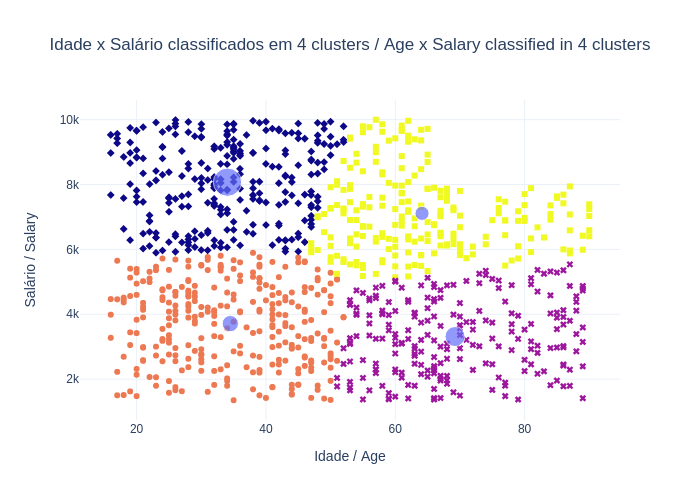

In [54]:
grafico = px.scatter(customer_full_data, x='idade', y='salario', color = 'cluster', symbol ='cluster')
grafico_centroide = px.scatter(x= centroide_clusters_Natural[:,0],
                               y=centroide_clusters_Natural[:,1],
                               size = [1,1/2,1/3,1/4])
fig = go.Figure(data = grafico.data + grafico_centroide.data)
fig.update_layout(title = 'Idade x Salário classificados em 4 clusters / Age x Salary classified in 4 clusters',
                  title_x = 0.5,
                  xaxis_title = 'Idade / Age',
                  yaxis_title = 'Salário / Salary',
                  template = 'plotly_white',
                  showlegend = False,
                  coloraxis_showscale= False)
fig.show("png")
# Eu adicionei a opção "png" para que o gráfico seja exibido no ambiente estático do GitHub. Remova "png" se você quiser vê-lo como um gráfico Plotly normal
# I've add the "png" option to showcase it on static environment from GitHub. Remove if you want to see it as a normal Plotly graph.

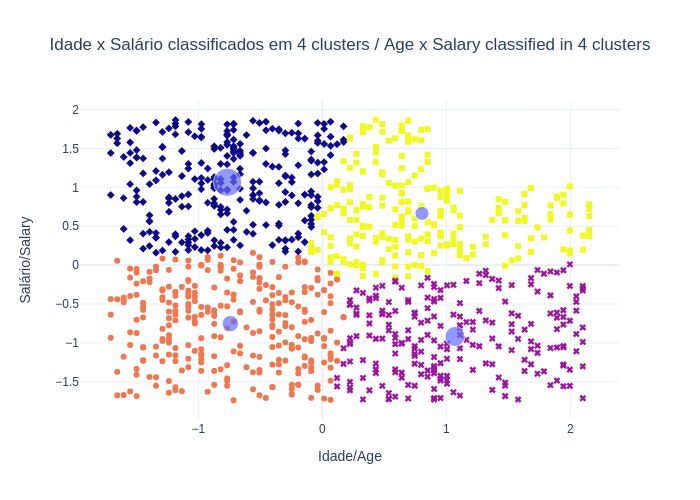

In [55]:
#Mesmo do gráfico acima, porém com dados normalizados
#Same as above, but in normalized data
grafico = px.scatter(x= idade_salario_normal[:,0], y=idade_salario_normal[:,1], color = label_cluster_customer_age_wage, symbol = label_cluster_customer_age_wage)
grafico_centroide = px.scatter(x= centroide_clusters[:,0],
                               y=centroide_clusters[:,1],
                               size = [1,1/2,1/3,1/4])
fig = go.Figure(data = grafico.data + grafico_centroide.data)
fig.update_layout(title = 'Idade x Salário classificados em 4 clusters / Age x Salary classified in 4 clusters',
                  title_x = 0.5,
                  xaxis_title = 'Idade/Age',
                  yaxis_title = 'Salário/Salary',
                  template = 'plotly_white',
                  showlegend = False,
                  coloraxis_showscale= False)
fig.show("png")
# Eu adicionei a opção "png" para que o gráfico seja exibido no ambiente estático do GitHub. Remova "png" se você quiser vê-lo como um gráfico Plotly normal
# I've add the "png" option to showcase it on static environment from GitHub. Remove if you want to see it as a normal Plotly graph.

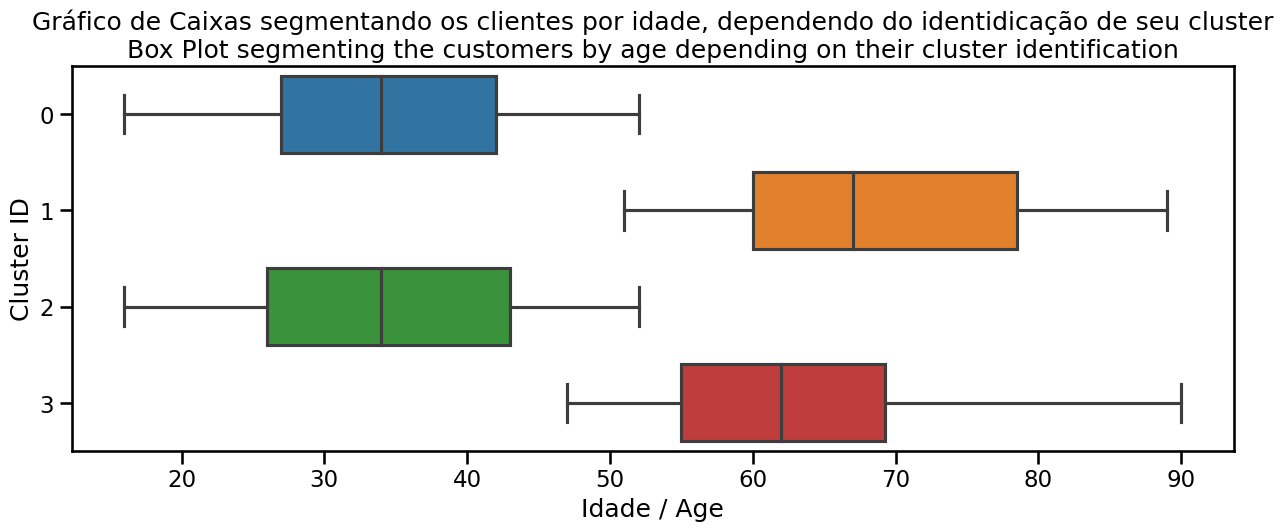

In [56]:
plt.figure(figsize=(15,5))
plt.title('Gráfico de Caixas segmentando os clientes por idade, dependendo do identidicação de seu cluster\nBox Plot segmenting the customers by age depending on their cluster identification')
plot1 = sns.boxplot(x= 'idade', y= 'cluster', data=customer_full_data, orient='h')
plot1.set(xlabel ='Idade / Age', ylabel = 'Cluster ID')
sns.set_context('notebook', font_scale=1.17)

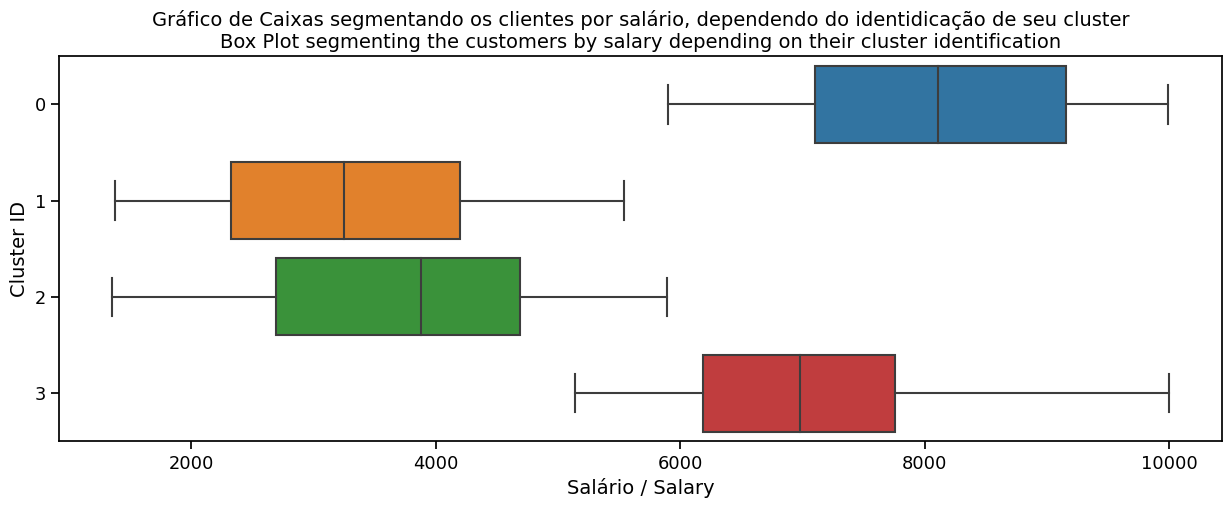

In [57]:
plt.figure(figsize=(15,5))
plt.title('Gráfico de Caixas segmentando os clientes por salário, dependendo do identidicação de seu cluster\nBox Plot segmenting the customers by salary depending on their cluster identification')
plot1 = sns.boxplot(x= 'salario', y= 'cluster', data=customer_full_data, orient='h')
plot1.set(xlabel ='Salário / Salary', ylabel = 'Cluster ID')
sns.set_context('notebook', font_scale=1.17)

In [58]:
customer_full_data.groupby('cluster')['salario'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,260.0,8070.723077,1227.066420,5898.0,7105.75,8108.5,9155.00,9989.0
1,223.0,3315.829596,1129.714569,1371.0,2322.00,3250.0,4197.50,5538.0
2,291.0,3713.553265,1238.127173,1350.0,2689.00,3878.0,4689.00,5895.0
3,220.0,7110.345455,1195.088262,5137.0,6184.25,6982.5,7757.25,9997.0


In [59]:
7110.345455 > 3713.553265+3315.829596

True

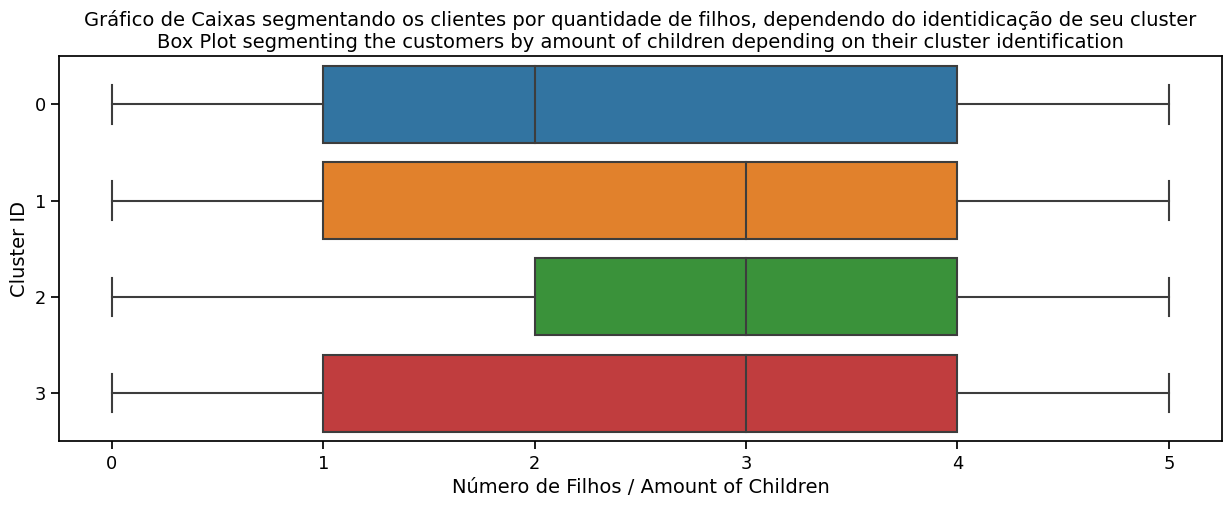

In [60]:
plt.figure(figsize=(15,5))
plt.title('Gráfico de Caixas segmentando os clientes por quantidade de filhos, dependendo do identidicação de seu cluster\nBox Plot segmenting the customers by amount of children depending on their cluster identification')
plot1 = sns.boxplot(x= 'qtd_filhos', y= 'cluster', data=customer_full_data, orient='h')
plot1.set(xlabel ='Número de Filhos / Amount of Children', ylabel = 'Cluster ID')
sns.set_context('notebook', font_scale=1.17)

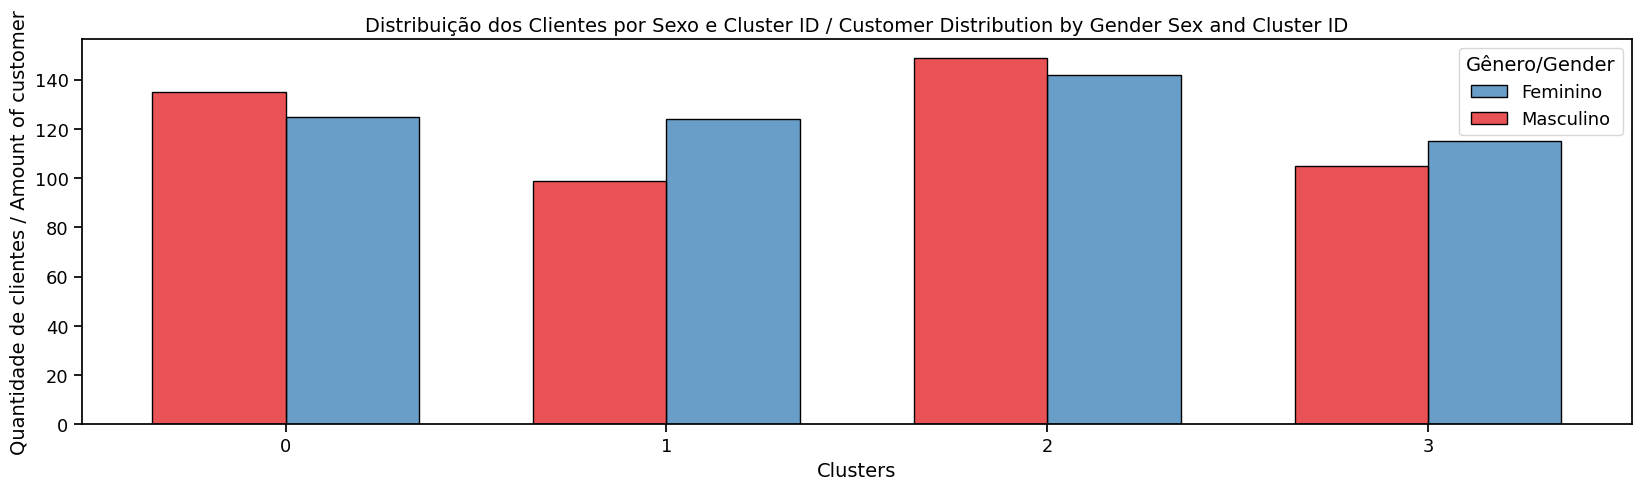

In [61]:
plt.figure(figsize=(20,5))
plt.title('Distribuição dos Clientes por Sexo e Cluster ID / Customer Distribution by Gender Sex and Cluster ID')
plot_GenderSex_cluster = sns.histplot(x='cluster', data = customer_full_data.sort_values('cluster'), hue='genero', palette='Set1',multiple='dodge', shrink = .7, discrete = True)
plot_GenderSex_cluster.set(xlabel = 'Clusters', ylabel = 'Quantidade de clientes / Amount of customer')
plot_GenderSex_cluster.set_xticks(range(4))
plt.legend(title='Gênero/Gender', loc='upper right', labels=['Feminino', 'Masculino'])
sns.set_context('talk')

In [62]:
customer_full_data.groupby(['genero','cluster'])['cluster'].describe()

count  mean  std  min  25%  50%  75%  max
genero    cluster                                           
feminino  0        135.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
          1         99.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0
          2        149.0   2.0  0.0  2.0  2.0  2.0  2.0  2.0
          3        105.0   3.0  0.0  3.0  3.0  3.0  3.0  3.0
masculino 0        125.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
          1        124.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0
          2        142.0   2.0  0.0  2.0  2.0  2.0  2.0  2.0
          3        115.0   3.0  0.0  3.0  3.0  3.0  3.0  3.0

In [63]:
customer_full_data.groupby(['estado'])['salario'].mean()

estado
Acre                   6029.666667
Alagoas                5971.264706
Amapá                  5406.813953
Amazonas               5881.475000
Bahia                  5315.370370
Ceará                  5928.209302
Distrito Federal       5492.255814
Espírito Santo         4763.280000
Goiás                  5391.078947
Maranhão               4878.500000
Mato Grosso            5969.166667
Mato Grosso do Sul     5491.550000
Minas Gerais           5411.864865
Paraná                 6008.613636
Paraíba                5643.828571
Pará                   6019.939394
Pernambuco             5143.866667
Piauí                  5084.181818
Rio Grande do Norte    5569.272727
Rio Grande do Sul      5507.250000
Rio de Janeiro         5385.658537
Rondônia               5537.447368
Roraima                5158.621622
Santa Catarina         5738.533333
Sergipe                4724.020833
São Paulo              5970.216216
Tocantins              5620.580645
Name: salario, dtype: float64

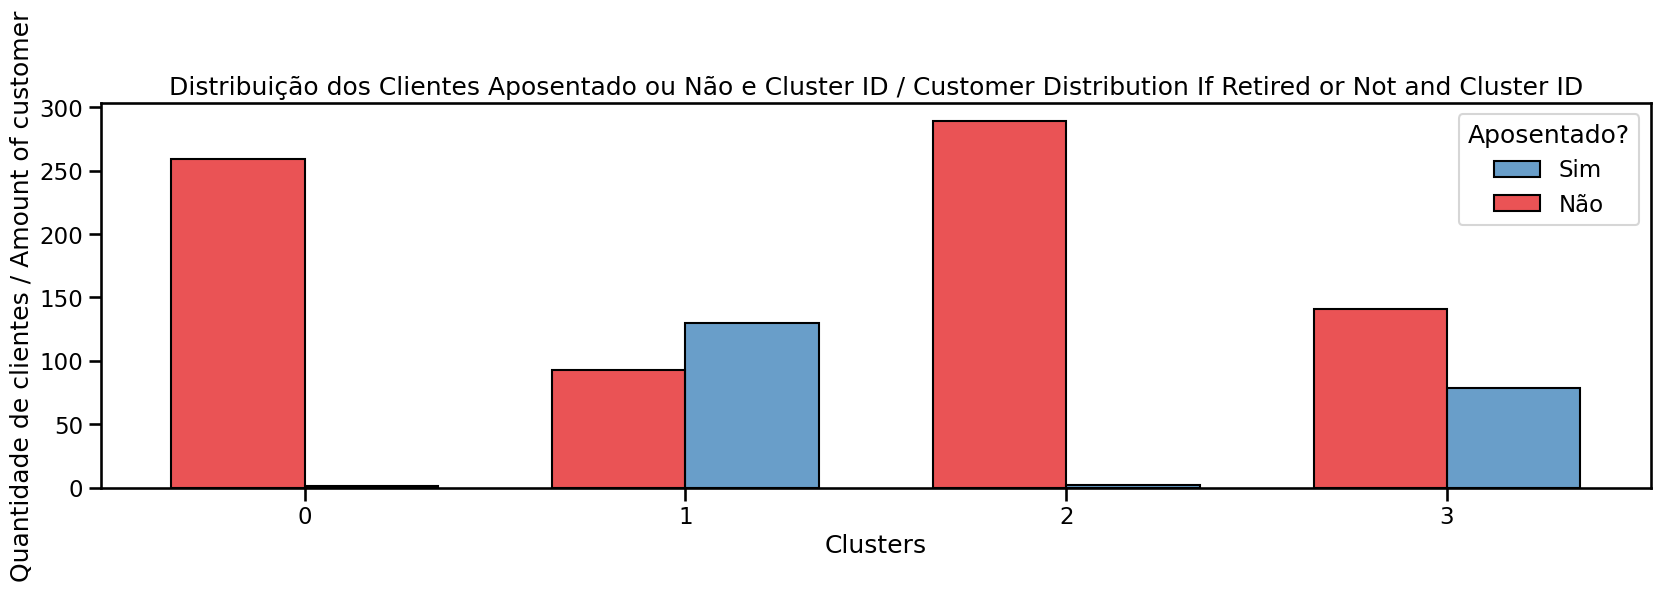

In [64]:
plt.figure(figsize=(20,5))
plt.title('Distribuição dos Clientes Aposentado ou Não e Cluster ID / Customer Distribution If Retired or Not and Cluster ID')
plot_GenderSex_cluster = sns.histplot(x='cluster', data = customer_full_data.sort_values('cluster'), hue='aposentado', palette='Set1',multiple='dodge', shrink = .7, discrete = True)
plot_GenderSex_cluster.set(xlabel = 'Clusters', ylabel = 'Quantidade de clientes / Amount of customer')
plot_GenderSex_cluster.set_xticks(range(4))
plt.legend(title='Aposentado?', loc='upper right', labels=['Sim', 'Não'])
sns.set_context('talk')

## 6.2 - Outras Análises Interessantes (A maioria por questões) / Other Interesting Analysis (Mostly by the Questions)

In [65]:
customer_full_data.groupby(['cluster','aposentado'])['aposentado'].describe()

count unique  top freq
cluster aposentado                       
0       Não          259      1  Não  259
        Sim            1      1  Sim    1
1       Não           93      1  Não   93
        Sim          130      1  Sim  130
2       Não          289      1  Não  289
        Sim            2      1  Sim    2
3       Não          141      1  Não  141
        Sim           79      1  Sim   79

In [66]:
customer_full_data.groupby(['aposentado'])['estado'].describe()

,count,unique,top,freq
aposentado,,,,
Não,782,27,Sergipe,42
Sim,212,27,Amapá,15


In [67]:
customer_full_data.groupby(['cluster','genero'])['genero'].describe()

count unique        top freq
cluster genero                                
0       feminino    135      1   feminino  135
        masculino   125      1  masculino  125
1       feminino     99      1   feminino   99
        masculino   124      1  masculino  124
2       feminino    149      1   feminino  149
        masculino   142      1  masculino  142
3       feminino    105      1   feminino  105
        masculino   115      1  masculino  115

In [68]:
customer_full_data.groupby(['plano_saude'])['estado'].describe()

,count,unique,top,freq
plano_saude,,,,
Não,482,27,Sergipe,27
Sim,512,27,Paraná,27


In [69]:
customer_full_data.groupby(['compras_3M','aposentado','cluster'])['genero'].describe()

count unique        top freq
compras_3M aposentado cluster                             
Não        Não        0         114      2   feminino   59
                      1          43      2  masculino   23
                      2         135      2   feminino   81
                      3          63      2   feminino   40
           Sim        0           1      1   feminino    1
                      1          59      2  masculino   34
                      3          34      2  masculino   24
Sim        Não        0         145      2   feminino   75
                      1          50      2  masculino   27
                      2         154      2  masculino   87
                      3          78      2  masculino   50
           Sim        1          71      2  masculino   40
                      2           2      2  masculino    1
                      3          45      2   feminino   27

In [70]:
customer_full_data.groupby(['cluster','genero'])['qtd_filhos'].describe()

count      mean       std  min  25%  50%  75%  max
cluster genero                                                       
0       feminino   135.0  2.437037  1.664410  0.0  1.0  3.0  4.0  5.0
        masculino  125.0  2.312000  1.733987  0.0  1.0  2.0  4.0  5.0
1       feminino    99.0  2.616162  1.765353  0.0  1.0  3.0  4.0  5.0
        masculino  124.0  2.556452  1.716976  0.0  1.0  3.0  4.0  5.0
2       feminino   149.0  2.932886  1.605162  0.0  2.0  3.0  4.0  5.0
        masculino  142.0  2.598592  1.676114  0.0  1.0  3.0  4.0  5.0
3       feminino   105.0  2.447619  1.663991  0.0  1.0  2.0  4.0  5.0
        masculino  115.0  2.608696  1.730509  0.0  1.0  3.0  4.0  5.0